In [1]:
# Import pandas,numpy
import pandas as pd
import numpy as np

In [2]:
# Import Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
#sns.set_context('poster',font_scale=0.8)
#pd.options.display.float_format = '{:.2f}'.format

In [3]:
# Read CSV's
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
#Combination of 2 csv's
combine = [train_df, test_df]

                                   ### Βασικές Πληροφορίες Dataset ###
 Στο Dataset αυτό, έχουμε 891 καταχωρήσεις επιβατών του Τιτανικού. Ανάμεσα στα στοιχεία βρίσκουμε Ονόματα, Φύλο, Ηλικία, σημείο επιβίβασης κ.α. 
Στην λίστα αυτή επίσης, βλέπουμε και το ποιοι από αυτούς τους επιβάτες, κατάφεραν να επιβιώσουν του ναυαγίου.

In [5]:
print(list(train_df))
print('-'*100)
print('Ο συνολικός αριθμός των στηλών είναι: ',len(list(train_df))) # Ο αριθμός των στηλών

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
----------------------------------------------------------------------------------------------------
Ο συνολικός αριθμός των στηλών είναι:  12


In [6]:
print(train_df.info()) # Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [7]:
print(train_df.describe()) # Extra Info

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [8]:
train_df.head() # Εμφάνιση των πρώτων 5 γραμμών του Dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


                                ΘΑ ΦΤΙΑΞΟΥΜΕ ΝΕΑ ΣΤΗΛΗ ΜΕ ΔΙΑΧΩΡΙΣΜΟ MALE/FEMALE & CHILD
                                 ΕΤΣΙ ΩΣΤΕ ΝΑ ΞΕΧΩΡΙΣΟΥΜΕ ΤΑ ΠΑΙΔΙΑ ΠΟΥ ΗΤΑΝ ΣΤΟ ΠΛΟΙΟ
                                 
                                ΑΠΟ ΤΗ ΣΤΙΓΜΗ ΠΟΥ ΥΠΑΡΧΕΙ Η ΝΕΑ ΣΤΗΛΗ PERSON ΔΕΝ ΧΡΕΙΑΖΟΜΑΣΤΕ
                                                ΠΛΕΟΝ ΤΗΝ ΣΤΗΛΗ SEX

In [9]:
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex

In [10]:
for dataset in combine:
    dataset['Person'] = dataset[['Age','Sex']].apply(get_person,axis=1)
    dataset.drop(['Sex'], axis=1, inplace=True)

                            ##### ΑΠΛΑ ΕΛΕΓΧΟΣ ΕΑΝ ΕΓΙΕΝ ΣΩΣΤΑ ΚΑΙ ΣΤΑ ΔΥΟ #####

In [11]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,female


In [12]:
test_df.head(2)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,male
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,female


                                 ΜΙΑ ΓΡΗΓΟΡΗ ΜΑΤΙΑ ΣΤA ΣΤΑΤΙΣΤΙΚΑ
                                       ΑΡΙΘΜΟΙ-ΔΙΑΓΡΑΜΜΑΤΑ

In [13]:
print('Ο συνολικός αριθμός των επιβατών είναι:',len(list(train_df['PassengerId'])))

Ο συνολικός αριθμός των επιβατών είναι: 891


In [14]:
print('O μέσος όρος ηλικίας των επιβατών είναι:', train_df['Age'].mean())

O μέσος όρος ηλικίας των επιβατών είναι: 29.69911764705882


In [15]:
print('O μέσος όρος εισιτηρίου ήταν:', train_df['Fare'].mean())

O μέσος όρος εισιτηρίου ήταν: 32.2042079685746


                                ######## ΕΠΙΒΑΤΕΣ ΠΟΥ ΣΩΘΗΚΑΝ #######

In [16]:
print(train_df.groupby(['Survived']).size())

Survived
0    549
1    342
dtype: int64


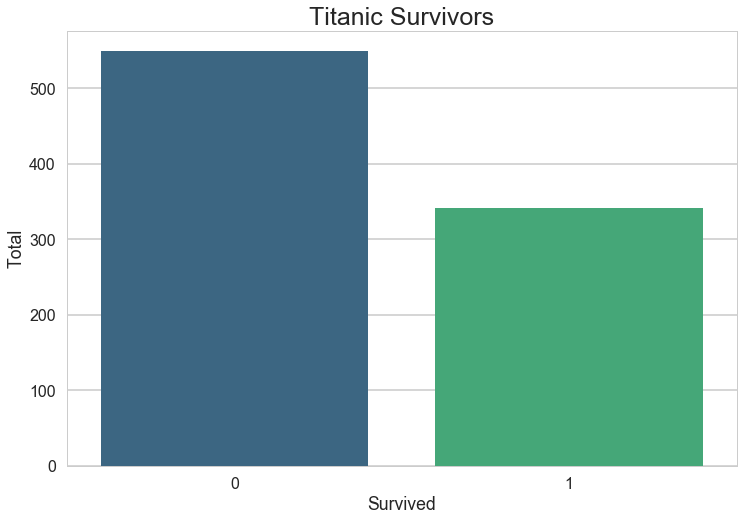

In [17]:
plt.figure(figsize=(12,8))
sns.set_context('poster')
ax = sns.countplot(x='Survived',data=train_df,palette='viridis')
ax.axes.set_title("Titanic Survivors",fontsize=25)
ax.set_xlabel("Survived")
ax.set_ylabel("Total")

                                ######## ΕΠΙΒΑΤΕΣ ΑΝΑ ΚΛΑΣΗ ########

In [18]:
print(train_df.groupby(['Pclass']).size())

Pclass
1    216
2    184
3    491
dtype: int64


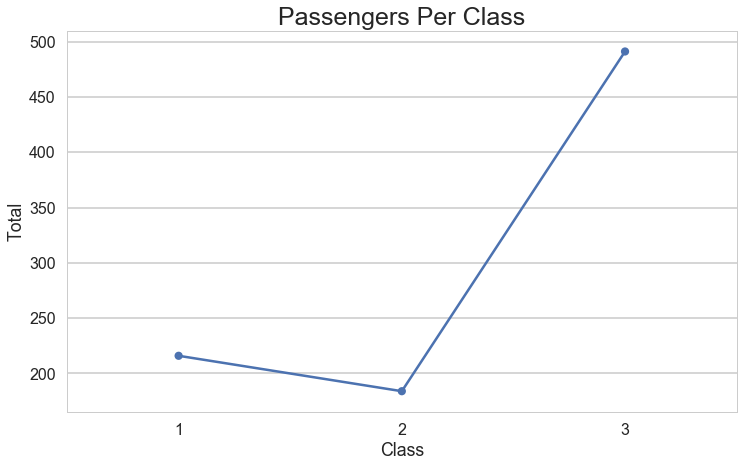

In [19]:
plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
sns.set_context('poster')
ax = sns.pointplot(x=sorted(train_df.Pclass.unique()), y = train_df.groupby(['Pclass']).size(),
              scale=0.5)
ax.axes.set_title("Passengers Per Class",fontsize=25)
ax.set_xlabel("Class")
ax.set_ylabel("Total")

                                ######## ΕΠΙΒΑΤΕΣ ΑΝΑ ΦΥΛΛΟ ########

In [20]:
print(train_df.groupby(['Person']).size())

Person
child      83
female    271
male      537
dtype: int64


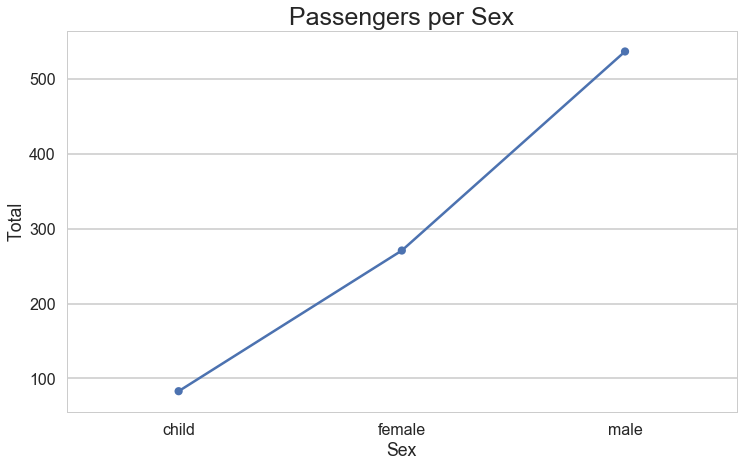

In [21]:
plt.figure(figsize=(12,7))
sns.set_context('poster')
ax = sns.pointplot(x=sorted(train_df.Person.unique()), y = train_df.groupby(['Person']).size(),
              scale=0.5)
ax.axes.set_title("Passengers per Sex",fontsize=25)
ax.set_xlabel("Sex")
ax.set_ylabel("Total")
#plt.savefig('PerSex.png')

                                ######### ΕΠΙΒΑΤΕΣ ΑΝΑ ΛΙΜΑΝΙ ΕΠΙΒΙΒΑΣΗΣ ######

In [22]:
print(train_df.groupby(['Embarked']).size())

Embarked
C    168
Q     77
S    644
dtype: int64


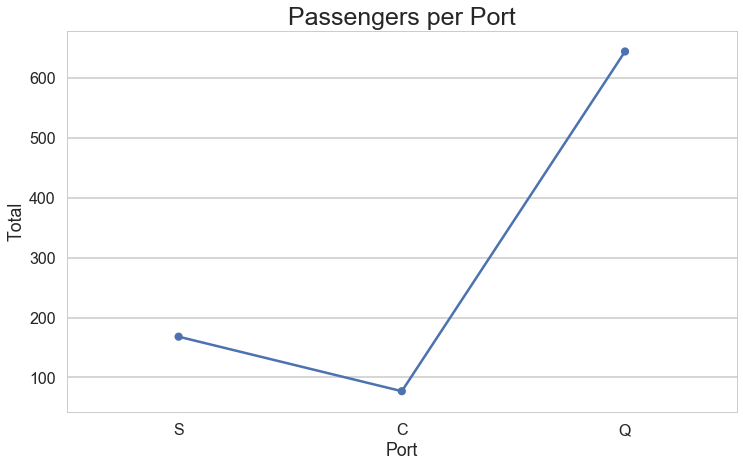

In [23]:
x = train_df.Embarked.unique()
x = x[~pd.isnull(x)]

plt.figure(figsize=(12,7))
sns.set_context('poster')
ax = sns.pointplot (x, y = train_df.groupby(['Embarked']).size(),scale=0.5)
ax.axes.set_title("Passengers per Port",fontsize=25)
ax.set_xlabel("Port")
ax.set_ylabel("Total")

                                  ####### ΕΠΙΒΑΤΕΣ ΑΝΑ ΗΛΙΚΙΑ #########

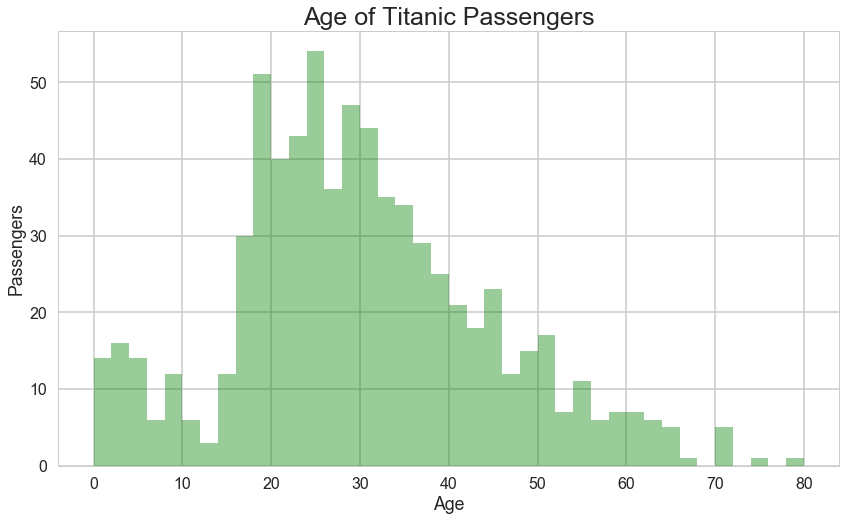

In [24]:
#train_df['Age'].hist(bins=40,color='darkred',alpha=0.7)
x = train_df['Age'].dropna()

bins = np.arange(0, 82, 2)
plt.figure(figsize=(14,8))
sns.set_context('poster')
ax = sns.distplot(x, kde=False, bins = bins, color = 'g')
ax.axes.set_title("Age of Titanic Passengers",fontsize=25)
ax.set_xlabel("Age")
ax.set_ylabel("Passengers")

#plt.savefig('Age.png')

                                ###### ΚΟΣΤΟΣ ΕΙΣΙΤΗΡΙΟΥ ΑΝΑ ΚΛΑΣΗ ######

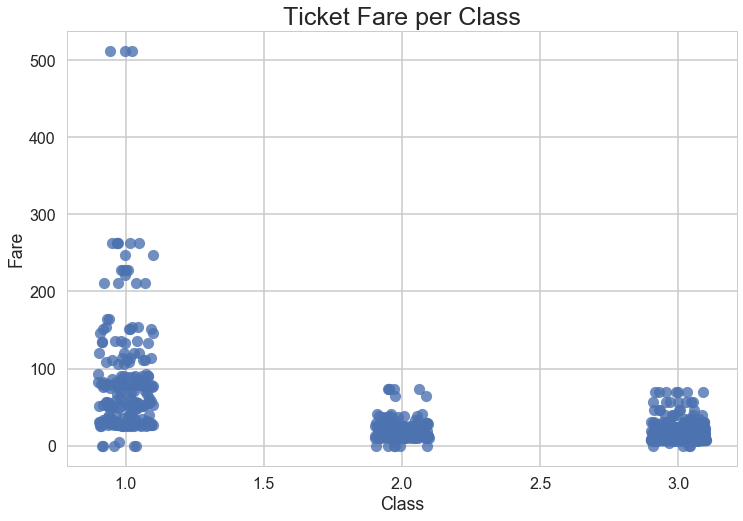

In [25]:
plt.figure(figsize=(12,8))
sns.set_context('poster')
ax = sns.regplot(x="Pclass", y="Fare", data=train_df, x_jitter=.1, fit_reg=False)
ax.axes.set_title("Ticket Fare per Class",fontsize=25)
ax.set_xlabel("Class")
ax.set_ylabel("Fare")

                                        ##### ΗΛΙΚΙΑ ΑΝΑ ΚΛΑΣΗ ######

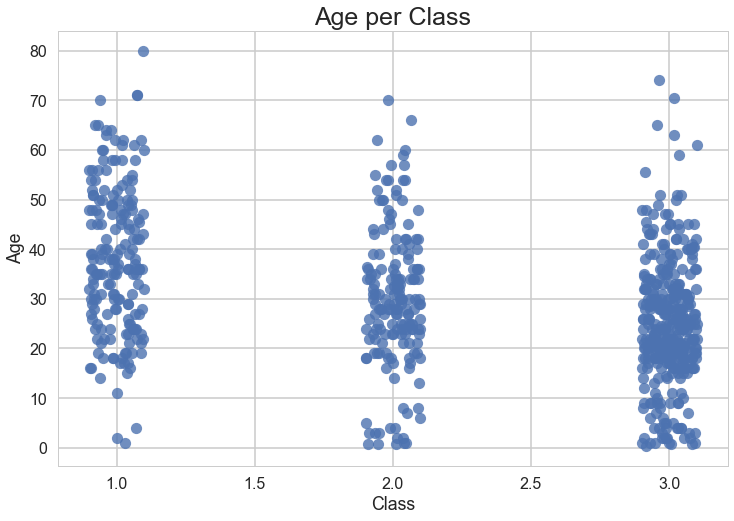

In [26]:
plt.figure(figsize=(12,8))
sns.set_context('poster')
ax = sns.regplot(x="Pclass", y="Age", data=train_df, x_jitter=0.1, fit_reg=False)
ax.axes.set_title("Age per Class",fontsize=25)
ax.set_xlabel("Class")
ax.set_ylabel("Age")

                                   ΕΠΙΒΙΩΣΗ ΕΠΙΒΑΤΩΝ ΣΤΑΤΙΣΤΙΚΑ ΣΤΟΙΧΕΙΑ
                                            ΚΑΙ ΔΙΑΓΡΑΜΜΑΤΑ

                            ####### ΕΠΙΒΙΩΣΗ ΕΠΙΒΑΤΩΝ ΑΝΑ ΚΛΑΣΗ ########

In [27]:
print (train_df[['Pclass', 'Survived']].groupby(['Pclass'], 
                as_index=False).mean().sort_values(by='Survived', ascending=False))
print('-'*100)
a = train_df[["Pclass", "Survived"]].groupby(['Pclass'], 
                as_index=False).sum().sort_values(by='Survived', ascending=False)
a['Percentage']= a['Survived']/a['Survived'].sum()
print(a)

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
----------------------------------------------------------------------------------------------------
   Pclass  Survived  Percentage
0       1       136    0.397661
2       3       119    0.347953
1       2        87    0.254386


                         ΤΟ 62% ΤΩΝ ΕΠΙΒΑΤΩΝ ΤΗΣ ΠΡΩΤΗΣ ΚΛΑΣΗΣ ΕΠΙΒΙΩΣΕ
                         ΤΟ 47% ΤΩΝ ΕΠΙΒΑΤΩΝ ΤΗΣ ΔΕΥΤΕΡΗΣ ΚΛΑΣΗΣ ΕΠΙΒΙΩΣΕ
                         ΤΟ 24% ΤΩΝ ΕΠΙΒΑΤΩΝ ΤΗΣ ΤΡΙΤΗΣ ΚΛΑΣΗΣ ΕΠΙΒΙΩΣΕ

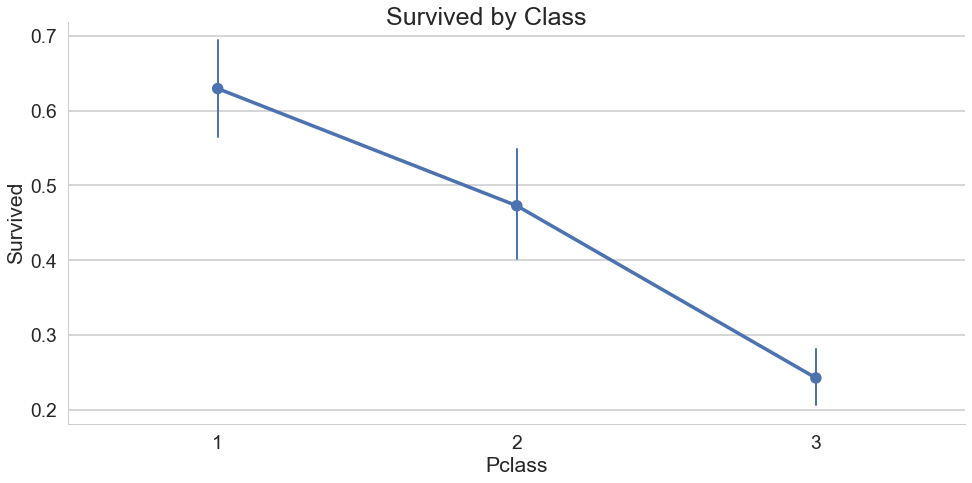

In [28]:
plt.figure(figsize=(11,7))
sns.set_context('poster',font_scale=1.2)
ax = sns.factorplot('Pclass','Survived', data=train_df,size=7,aspect=2, 
               errwidth = 2, scale = 0.7)
plt.subplots_adjust(top=0.95)
ax.fig.suptitle('Survived by Class',fontsize=25)

                            ######### ΕΠΙΒΙΩΣΗ ΕΠΙΒΑΤΩΝ ΑΝΑ ΦΥΛΛΟ ########

                                ΤΟ 75% ΤΩΝ ΓΥΝΑΙΚΩΝ ΕΠΙΒΙΩΣΕ
                                ΤΟ 59% ΤΩΝ ΠΑΙΔΙΩΝ ΕΠΙΒΙΩΣΕ
                                ΤΟ 16% ΤΩΝ ΑΝΤΡΩΝ ΕΠΙΒΙΩΣΕ

In [29]:
print (train_df[['Person', 'Survived']].groupby(['Person'], 
                as_index=False).mean().sort_values(by='Survived', ascending=False))
print('-'*100)
b = train_df[["Person", "Survived"]].groupby(['Person'], 
                as_index=False).sum().sort_values(by='Survived', ascending=False)
b['Percentage']= b['Survived']/b['Survived'].sum()
print(b)

   Person  Survived
1  female  0.756458
0   child  0.590361
2    male  0.163873
----------------------------------------------------------------------------------------------------
   Person  Survived  Percentage
1  female       205    0.599415
2    male        88    0.257310
0   child        49    0.143275


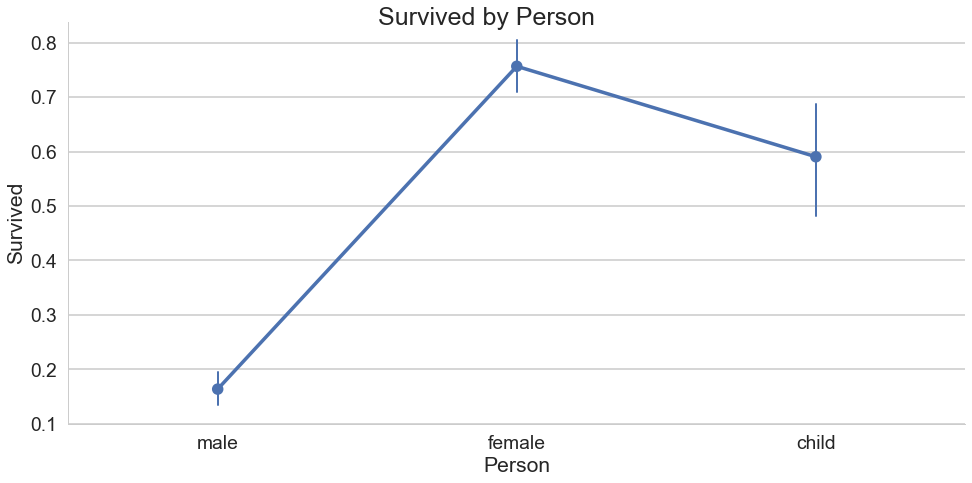

In [30]:
plt.figure(figsize=(11,7))
sns.set_context('poster',font_scale=1.2)
ax = sns.factorplot('Person','Survived', data=train_df,size=7,aspect=2, 
               errwidth = 2, scale = 0.7)
plt.subplots_adjust(top=0.95)
ax.fig.suptitle('Survived by Person',fontsize=25)
#ax.set_xticklabels("")

                        ###### ΕΠΙΒΙΩΣΗ ΕΠΙΒΑΤΩΝ ΑΝΑ ΛΙΜΑΝΙ ΕΠΙΒΙΒΑΣΗΣ #######

In [31]:
print (train_df[['Embarked', 'Survived']].groupby(['Embarked'], 
                as_index=False).mean().sort_values(by='Survived', ascending=False))
print('-'*100)
c = train_df[["Embarked", "Survived"]].groupby(['Embarked'], 
                as_index=False).sum().sort_values(by='Survived', ascending=False)
c['Percentage']= c['Survived']/c['Survived'].sum()
print(c)

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957
----------------------------------------------------------------------------------------------------
  Embarked  Survived  Percentage
2        S       217    0.638235
0        C        93    0.273529
1        Q        30    0.088235


                            ΤΟ 65% ΟΣΩΝ ΕΠΙΒΙΒΑΣΘΗΚΑΝ ΣΤΟ C ΕΠΙΒΙΩΣΕ
                            ΤΟ 38% ΟΣΩΝ ΕΠΙΒΙΒΑΣΘΗΚΑΝ ΣΤΟ Q ΕΠΙΒΙΩΣΕ
                            ΤΟ 33% ΟΣΩΝ ΕΠΙΒΙΒΑΣΘΗΚΑΝ ΣΤΟ SOUTHAMPTON ΕΠΙΒΙΩΣΕ

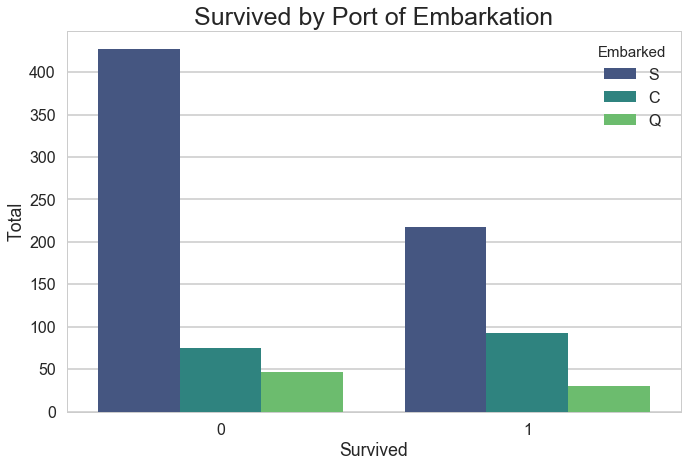

In [32]:
labels = {"A","B"}
plt.figure(figsize=(11,7))
sns.set_context('poster')
ax = sns.countplot(x='Survived',hue='Embarked',data=train_df,palette='viridis')
ax.axes.set_title("Survived by Port of Embarkation",fontsize=25)
ax.set_xlabel("Survived")
ax.set_ylabel("Total")
#ax.set_xticklabels(labels, fontsize=15)

                        ##### ΕΠΙΒΙΩΣΗ ΕΠΙΒΑΤΩΝ ΜΕ ΒΑΣΗ ΤΗΝ ΗΛΙΚΙΑ ##########

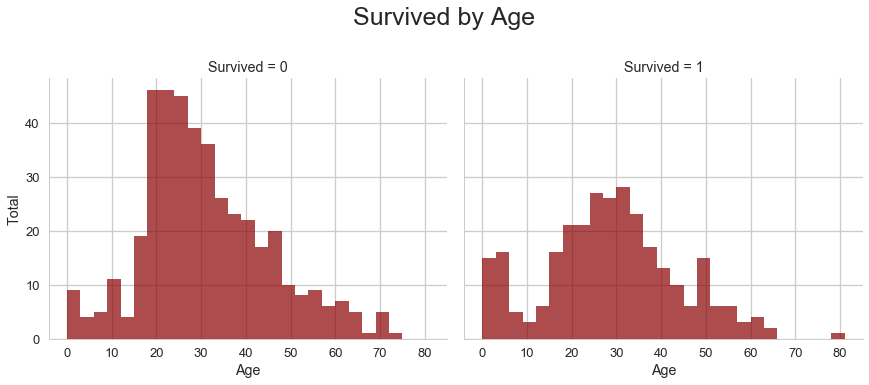

In [33]:
bins = np.arange(0, 82, 3)
sns.set_context('talk')
g = sns.FacetGrid(train_df, col="Survived", size=5.5, aspect=1.1)
g = g.map(plt.hist, "Age", color="darkred", alpha=0.7, bins=bins)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survived by Age',fontsize=25)
g.axes[0,0].set_ylabel('Total')
#plt.savefig('Age2.png')

                     ######## ΕΠΙΒΙΩΣΗ ΕΠΙΒΑΤΩΝ ΜΕ ΒΑΣΗ ΤΗΝ ΤΙΜΗ ΤΟΥ ΕΙΣΙΤΗΡΙΟΥ #######

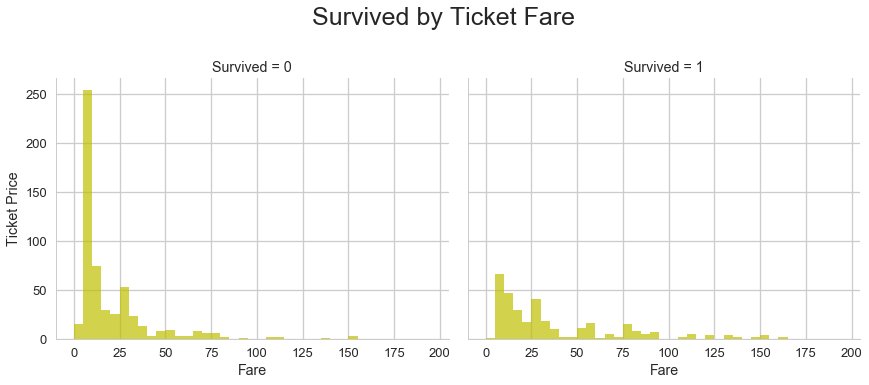

In [34]:
bins = np.arange(0, 200,5)
sns.set_context('talk')
g = sns.FacetGrid(train_df, col="Survived", size=5.5, aspect=1.1)
g = g.map(plt.hist, "Fare", color="y", alpha=0.7, bins=bins)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survived by Ticket Fare',fontsize=25)
g.axes[0,0].set_ylabel('Ticket Price')
#plt.savefig('Age2.png')

                ######## ΕΛΕΓΧΟΣ ΕΠΙΒΙΩΣΗΣ ΜΕ ΒΑΣΗ ΤΟ ΛΙΜΑΝΙ ΕΠΙΒΙΒΑΣΗΣ ΚΑΙ ΤΟ ΦΥΛΟ #######

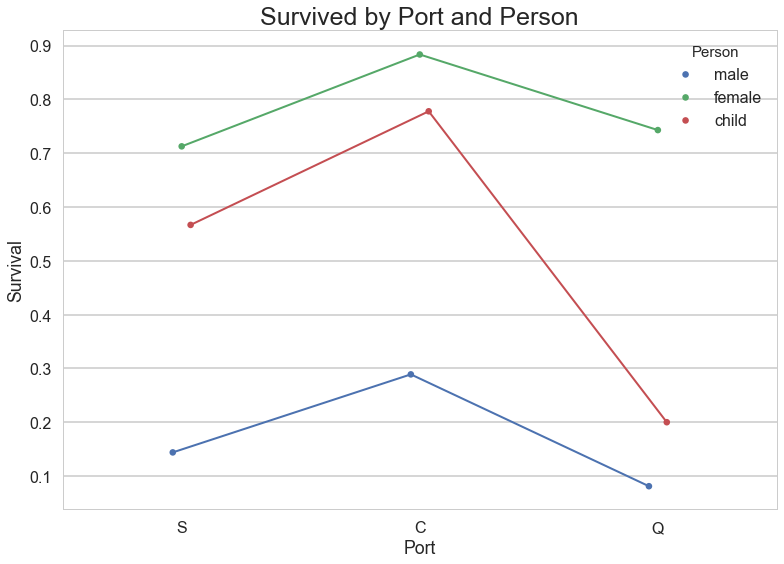

In [35]:
sns.set_context('poster')
ax = sns.pointplot(x="Embarked", y="Survived", hue='Person',
                   data=train_df, dodge=True,size=1, scale = 0.4, join=True, ci=None)
ax.axes.set_title("Survived by Port and Person",fontsize=25)
ax.set_xlabel("Port")
ax.set_ylabel("Survival")

                ######## ΕΛΕΓΧΟΣ ΕΠΙΒΙΩΣΗΣ ΜΕ ΒΑΣΗ ΤΟ ΛΙΜΑΝΙ ΕΠΙΒΙΒΑΣΗΣ ΚΑΙ ΤΗΝ ΚΛΑΣΗ #######

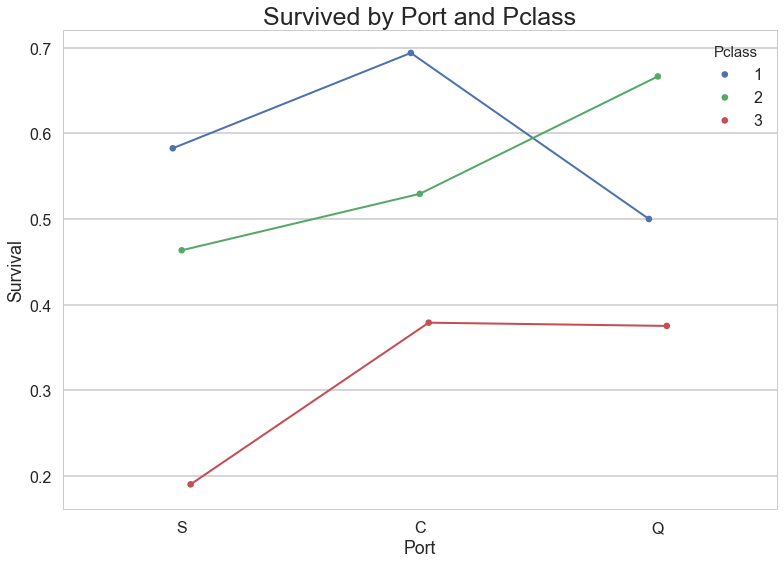

In [36]:
sns.set_context('poster')
ax = sns.pointplot(x="Embarked", y="Survived", hue='Pclass',
                   data=train_df, dodge=True, scale = 0.4, join=True, ci=None)
ax.axes.set_title("Survived by Port and Pclass",fontsize=25)
ax.set_xlabel("Port")
ax.set_ylabel("Survival")

                ######## ΕΛΕΓΧΟΣ ΕΠΙΒΙΩΣΗΣ ΜΕ ΒΑΣΗ ΤΗΝ ΚΛΑΣΣΗ ΚΑΙ ΤΗΝ ΗΛΙΚΙΑ #######

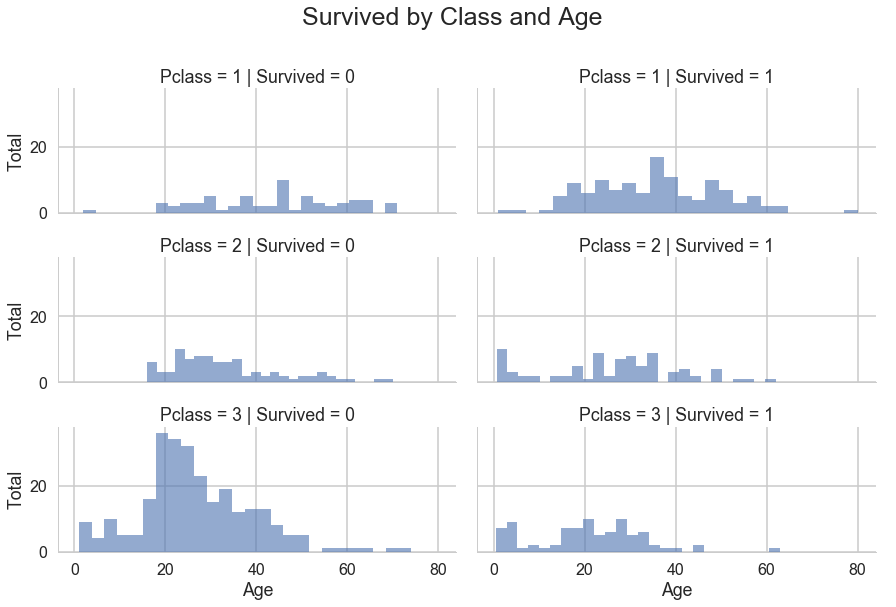

In [37]:
sns.set_context('poster')
g = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.9, aspect=2.1)
g.map(plt.hist, 'Age', alpha=.6, bins=26)
g.add_legend();
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Survived by Class and Age',fontsize=25)
g.axes[0,0].set_ylabel('Total')
g.axes[1,0].set_ylabel('Total')
g.axes[2,0].set_ylabel('Total')

                         ###### ΕΛΕΓΧΟΣ ΕΠΙΒΙΩΣΗΣ ΜΕ ΒΑΣΗ ΤΗΝ ΚΛΑΣΗ ΚΑΙ ΤΟ ΦΥΛΛΟ #####

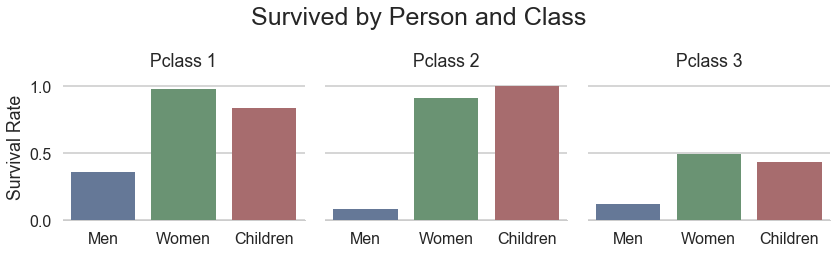

In [38]:
sns.set_context(font_scale=2.5)
g = sns.factorplot(x="Person", y="Survived", col="Pclass",data=train_df, saturation=.5, kind="bar", ci=None, aspect=1)
g.fig.suptitle('Survived by Person and Class',fontsize=25)
plt.subplots_adjust(top=0.75)
(g.set_axis_labels("", "Survival Rate")
.set_xticklabels(["Men", "Women", "Children"])
.set_titles(" {col_var} {col_name} ")
.set(ylim=(0, 1.1))
.despine(left=True)) 

                   #### ΕΛΕΓΧΟΣ ΤΟΥ DATASET ΓΙΑ ΤΥΧΟΝ ΚΑΤΑΧΩΡΗΣΕΙΣ ΠΟΥ ΛΕΙΠΟΥΝ ######

In [39]:
print(train_df.isnull().sum())
print('-'*50)
print('Συνολικά λείπουν: ',train_df.isnull().sum().sum(),' καταχωρήσεις')
print('-'*50)

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Person           0
dtype: int64
--------------------------------------------------
Συνολικά λείπουν:  866  καταχωρήσεις
--------------------------------------------------


                    ####### ΑΝΑΠΑΡΑΣΤΑΣΗ ΤΩΝ ΣΤΟΙΧΕΙΩΝ ΠΟΥ ΛΕΙΠΟΥΝ ΜΕ ΔΙΑΓΡΑΜΜΑ #######

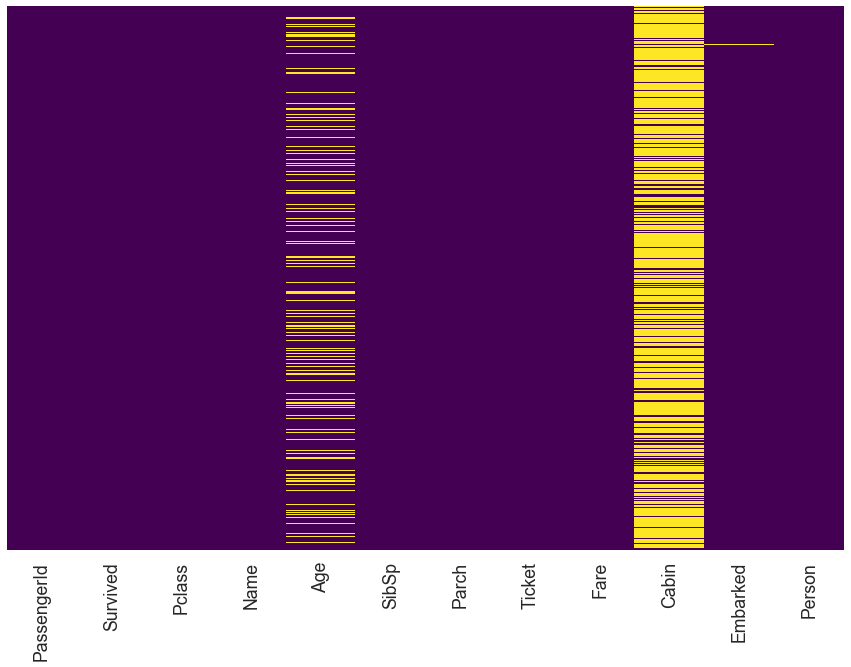

In [40]:
sns.set_context('poster',font_scale=1.1)
plt.figure(figsize=(15,10))
sns.set_context(font_scale=1.3)
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False, cmap='viridis')
#plt.savefig('MissingData.png')

    Λείπουν 177 καταχωρήσεις στην κατηγορία της ηλικίας, 687 καταχωρήσεις στην κατηγοράις της καμπίνας και μόλις 2 καταχωρήσεις στην κατηγορία του λιμανιού επιβίβασης. 
    Θα καλύψουμε τα κενά αυτά, ψάχνοντας την μέση ηλικία ανδρών-γυναικών-παιδιών ξεχωριστά και με τα νούμερα που θα βρούμε, θα γεμίσουμε τα κενά αυτά.

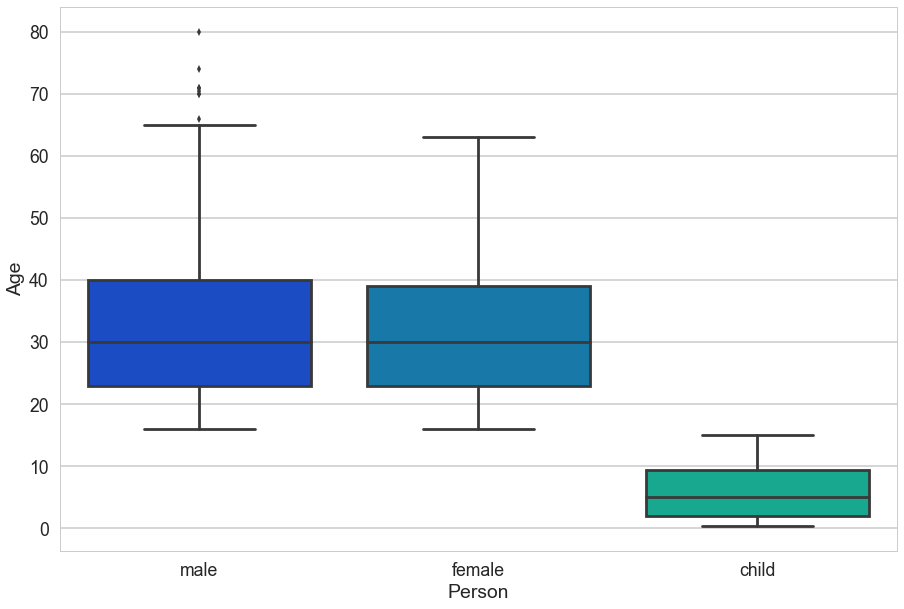

In [41]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Person',y='Age',data=train_df,palette='winter')

In [42]:
print("Ο μέσος όρος ηλικίας των παιδιών ήταν: ",train_df.loc[train_df['Person'] == 2, 'Age'].mean())
print("Ο μέσος όρος ηλικίας των ανδρών ήταν: ",train_df.loc[train_df['Person'] == 0, 'Age'].mean())
print("Ο μέσος όρος ηλικίας των γυναικών ήταν: ", train_df.loc[train_df['Person'] == 1 , 'Age'].mean())

Ο μέσος όρος ηλικίας των παιδιών ήταν:  nan
Ο μέσος όρος ηλικίας των ανδρών ήταν:  nan
Ο μέσος όρος ηλικίας των γυναικών ήταν:  nan


Έχοντας γνώση του μέσου όρου ηλικίας ανδρών, γυναικών και παιδιών, θα δημιουργήσουμε συνάρτηση έτσι ώστε να συμπληρώσουμε όλα τα κενά. Όλα τα κενά παιδιά των παιδιών θα λάβουν την ηλικία των 6, των ανδρών 33 και των γυναικών 32.

In [43]:
def age(cols):
    Age = cols[0]
    Person = cols[1]
    
    if pd.isnull(Age):

        if Person == "child":
            return 6

        elif Person == "male":
            return 33

        else:
            return 32

    else:
        return Age

In [44]:
for dataset in combine:
    dataset['Age'] = dataset[['Age','Person']].apply(age,axis=1)

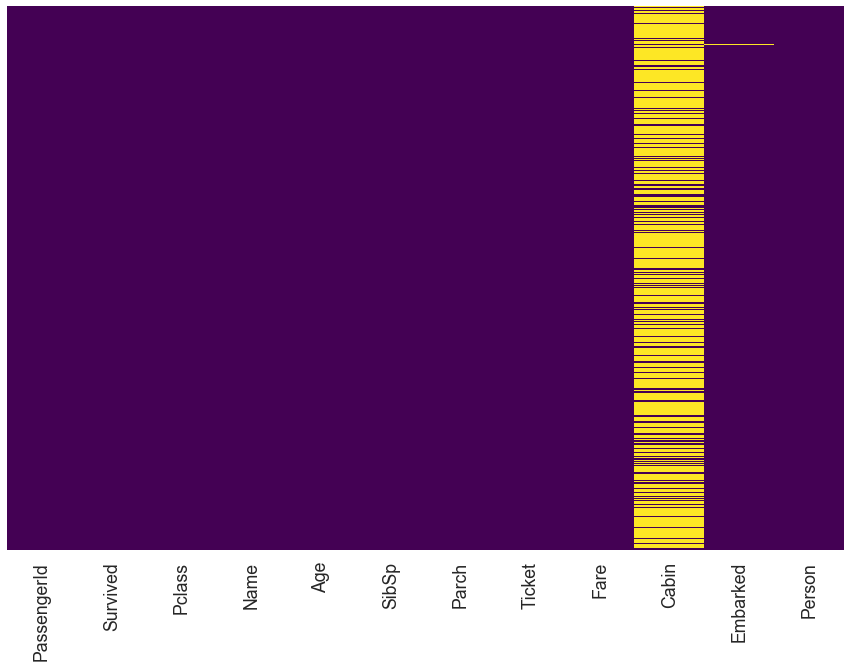

In [45]:
sns.set_context('poster',font_scale=1.1)
plt.figure(figsize=(15,10))
sns.set_context(font_scale=1.3)
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False, cmap='viridis')
#plt.savefig('MissingData.png')

    Η στήλη cabin έχει πάρα πολλά κενά και δεν έχει κάποια ιδιαίτερη αξία για εμάς. Οπότε, θα την σβήσουμε εντελώς. Επίσης θα γεμίσουμε τα δύο κενά του Embarked, βάζοντας την τιμή που εμφανίζεται συχνότερα στην στήλη αυτή.

In [46]:
for dataset in combine:
    dataset.drop('Cabin',axis=1,inplace=True)

In [47]:
for dataset in combine:
    dataset.Embarked.fillna(value=(dataset.Embarked.value_counts().idxmax()), inplace=True)

In [48]:
print(train_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Person         0
dtype: int64


                                ##### MACHINE LEARNING SECTION #########

                            ##### ΜΕΤΑΤΡΟΠΗ ΤΩΝ MALE, FEMALE, CHILD ΣΕ 0,1,2 ######

In [49]:
#train_df['Person']=pd.factorize(train_df['Person'])[0]
for dataset in combine:
    dataset['Person'] = dataset['Person'].map( {'female': 1, 'male': 0, 'child':2 } ).astype(int)
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q':2 } ).astype(int)
    
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].fillna(0).astype(int)
    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 						        = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age']      = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age']      = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age']      = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] 							    = 4
    dataset['Age'] = dataset['Age'].astype(int)

              ΔΙΑΓΡΑΦΟΥΜΕ ΕΝΤΕΛΩΣ ΤΗΝ ΣΤΗΛΗ TICKET & NAME ΚΑΘΩΣ ΔΕΝ ΥΠΑΧΕΙ ΕΥΚΟΛΟΣ ΤΡΟΠΟΣ ΕΚΜΕΤΑΛΛΕΥΣΗΣ

In [50]:
for dataset in combine:
    dataset.drop('Ticket',axis=1,inplace=True)
    dataset.drop('Name',axis=1,inplace=True)

In [51]:
train_df.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Person
0,1,0,3,1,1,0,0,0,0
1,2,1,1,2,1,0,3,1,1


In [52]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [53]:
for dataset in combine:
    dataset.loc[dataset['FamilySize'] ==1, 'FamilySize']     = 1
    dataset.loc[dataset['FamilySize'] >1, 'FamilySize']    = 0
    dataset['IsAlone'] = dataset['FamilySize'].astype(int)

In [54]:
for dataset in combine:
    dataset.drop('FamilySize', axis=1, inplace=True)

In [55]:
for dataset in combine:
    dataset.drop('SibSp', axis=1, inplace=True)
    dataset.drop('Parch', axis=1, inplace=True)

In [65]:
train_df.drop('PassengerId', axis=1, inplace=True)

In [66]:
train_df.head()

,Survived,Pclass,Age,Fare,Embarked,Person,IsAlone
0,0,3,1,0,0,0,0
1,1,1,2,3,1,1,0
2,1,3,1,1,0,1,1
3,1,1,2,3,0,1,0
4,0,3,2,1,0,0,1


In [67]:
test_df.head()

,PassengerId,Pclass,Age,Fare,Embarked,Person,IsAlone
0,892,3,2,0,2,0,1
1,893,3,2,0,0,1,0
2,894,2,3,1,2,0,1
3,895,3,1,1,0,0,1
4,896,3,1,1,0,1,0


In [68]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

In [69]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [70]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

78.900000000000006

In [71]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.829999999999998

In [72]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

81.260000000000005

In [73]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

73.629999999999995

In [74]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.909999999999997

In [75]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.010000000000005

In [76]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

78.450000000000003

In [77]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.75

In [78]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.75

In [79]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,85.75
8,Decision Tree,85.75
0,Support Vector Machines,82.83
1,KNN,81.26
5,Perceptron,79.91
7,Linear SVC,79.01
2,Logistic Regression,78.90
6,Stochastic Gradient Decent,78.45
4,Naive Bayes,73.63


In [82]:
split_df = train_df

In [83]:
split_df.head(2)

,Survived,Pclass,Age,Fare,Embarked,Person,IsAlone
0,0,3,1,0,0,0,0
1,1,1,2,3,1,1,0


In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(split_df.drop('Survived',axis=1), 
                                                    split_df['Survived'], test_size=0.30)

In [112]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [113]:
predictions = logmodel.predict(X_test)

In [114]:
from sklearn.metrics import classification_report

In [115]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.78      0.93      0.85       162
          1       0.84      0.59      0.70       106

avg / total       0.80      0.79      0.79       268

